In [2]:
import wordcloud
from wordcloud import WordCloud

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import wordcloud
#from wordcloud.wordCcloud import WordCloud
from collections import Counter
import numpy as np
import textblob 
from textblob import TextBlob

In [4]:
# import warnings 
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# warnings.filterwarnings(action='once')

## <font color='green'>Data & Global variable</font>

I joined lyrics (processed rdata file) and artist csv file together and drop the NAN values.
For lyrics anlysis, only original lyrics file will be used. I also set some global varibale to subset the dataframe, pls refer to whole code for more detail
 


In [5]:
lyrics = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/output/dt_lyrics.csv')
artists = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/data/artists.csv')

In [6]:
#some operation for data cleaning 
artists_filter = artists.dropna()
lyrics_copy = lyrics.copy()
#join df of aritst and lyrics drop all the NAN values
df_join_lyrics_artist = lyrics_copy.join(artists_filter.set_index('Artist'), on = 'artist').dropna()

In [7]:
#Global varibales, cols that would be keeped
keep_coulms_label = [ 'song', 'year', 'artist', 'genre', 'id', 'stemmedwords']
keep_label_join = ['year', 'artist', 'genre', 'stemmedwords', 'Intro', 'Formed', 'Members', 'Origin']

In [8]:
genre_list = list(set(lyrics['genre']))
artist_list =  list(set(df_join_lyrics_artist['artist']))
origin_list = list(set(df_join_lyrics_artist['Origin']))

artist_1 =  artist_list[0:int(len(artist_list)/2)] 
artist_2 = [item for item in artist_list if item not in artist_1]

#### Genreal plot to see how many songs were in lyrics file regarding to different genre

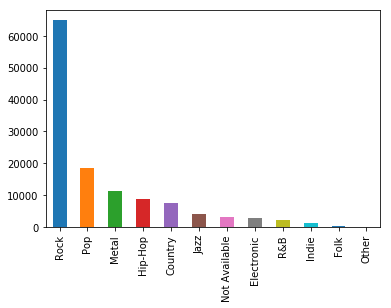

In [9]:
lyrics['genre'].value_counts().plot.bar()

In [38]:
def df_genre(genre):
    """sub original lyrics dataframe by genre
    Input
    ------
        genre: different genre, a string
    Return
    ------
        dataframe that only contain rows that belong to input genre"""
    dataframe_all =  lyrics[lyrics['genre']==genre]
    return dataframe_all[keep_coulms_label]

def df_formed(formed):
    """sub original lyrics dataframe by formed yaer
    Input
    ------
        formed: different formed, a string
    Return
    ------
        dataframe that only contain rows that belong to input year"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['Formed'] == formed]
    return dataframe_all[keep_label_join]

def df_artist(artist):
    """sub original lyrics dataframe by artist
    Input
    ------
        artist: different people, a string
    Return
    ------
        dataframe that only contain rows that belong to input artist"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['artist'] == artist]
    return dataframe_all[keep_label_join]
    

def df_origin(origin_str):
    """sub original lyrics dataframe by origin
    Input
    ------
        origin_str: a string
    Return
    ------
        dataframe that only contain rows that belong to origin"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['Origin'] == origin_str]
    return dataframe_all[keep_label_join]



    
def series_stemmedwords (dataframe_genre):
    """return a pandas series that only contain stemmedwords"""
    return dataframe_genre['stemmedwords']

def df_add_words(dataframe_genre):
    #https://sigdelta.com/blog/text-analysis-in-pandas/
    dataframe_genre_add = dataframe_genre.copy()
    dataframe_genre_add['words'] = dataframe_genre_add.stemmedwords.str.strip().str.split('[\W_]+')
    return dataframe_genre_add

def list_all_words(dataframe_add):
    """get a list contain all words in stemmwords
    Input
    -----
        dataframe_add : a dataframe, should be the one add words col
    Return
    ----
        a list contain every words from words col"""

    combine_list_words = list()
    for l in dataframe_add['words']:
        combine_list_words.append(l)
    combine_list_words = [val for sublist in combine_list_words for val in sublist] 
    return combine_list_words

def float_words_using(dataframe_add):
    return len(set(list_all_words(dataframe_add)))/len(list_all_words(dataframe_add))


def float_words_artist_main(artist_name):
    df_artisttest = df_artist(artist_name)
    df_artisttest_add = df_add_words(df_artisttest)
    return [artist_name,float_words_using(df_artisttest_add)]



def df_counts_words(list_words,int_common = None):
    """get a df with only words and counts
    Input
    ----
        list_words: a list of words that want to count,should be the output of list_all_words
        int_common: a int, the first how many words with highest freq want to show
    Return
    ------
        a dataframe that only contain words and counts, from max to min order"""
    counts = Counter(list_words)
    df_counts = pd.DataFrame(
    {'words': list(counts.keys()),
     'counts': list(counts.values())
    })
    df_counts = df_counts.sort_values('counts',ascending=False)
    if int_common is not None:
        return df_counts.iloc[0:int_common]
    return df_counts


def df_counts_word_main(classification_str,label,int_common = None):
    """dataframe of what words been used most by artist of genre
    Input
    ----
        classfication_str: a string, name of a artist or type of genre or origin_address
        label: artist, or type,string
        int_common: a int, show the most several words
    Return
    -----
        dataframe with words and time of words appear"""
    if label == 'artist':
        df_get = df_artist(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    if label == 'genre':
        df_get = df_genre(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    if label == 'origin':
        df_get = df_origin(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    
    
    

def word_cloud_plot(list_words,int_common=None):
    
    #https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
    d = {}
    for a, x in df_counts_words(list_words,int_common).values:
        d[a] = x
    #convert list to string and generate
    unique_string=(" ").join(list_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(10,4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

def word_cloud_main(classification_str,label,int_common=None):
    """main function for word cloud via genre
    Input
    ----
        classfication_str: a string, name of a artist or type of genre or origin_address
        label: artist, or type,string
        int_common: a int, show the most several words
    Return
    ----
        a plot of wordcloud"""
    
    if label == 'artist':
        df_get = df_artist(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)
    if label == 'genre':
        df_get = df_genre(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)
    if label == 'origin':
        df_get = df_origin(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)

def list_counts_common_word(label,var_list,int_common = None):
    """return a nested list with popular words count
    Input
    ------
        label: artist/genre,origin, string, uesed to classify the type
        var_list: origin_list, genre_list, artist_list
        int_common: how many most words want to show
    Return
    -----
        a nested list contain all int_common in given label"""
    l_test_sum = []
    if label == 'origin':
        for position in var_list:
            df_test = df_counts_word_main(position,'origin',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    if label == 'genre':
        for position in var_list:
            df_test = df_counts_word_main(position,'genre',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    if label == 'artist':
        for position in var_list:
            df_test = df_counts_word_main(position,'artist',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    
def bar_plot_freq(label,var_list,int_common,int_words = 10):
    """retun a bar plot to common words
    label: string
    int_common
    int_words:int, for how many words display in the plot"""
    if label == 'artist':
        l_list = list_counts_common_word('artist',var_list,int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])
    if label == 'genre':
        l_list = list_counts_common_word('genre',var_list,int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])
    if label == 'origin':
        l_list = list_counts_common_word('origin',var_list,int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])
    
def num_genre_in_origin(origin_str):
    return [len(set(df_origin(origin_str)['genre'])),list(set(df_origin(origin_str)['genre'])),origin_str]

## <font color='green'>Topics : Popular words and vocabulary</font>

### <font color='green'>and some sentimental analysis regarding to origin of songs</font>


#### Before we get started to explain the topic, let's have a quick glance on what words tends to appear in different lyrics:   

Rock


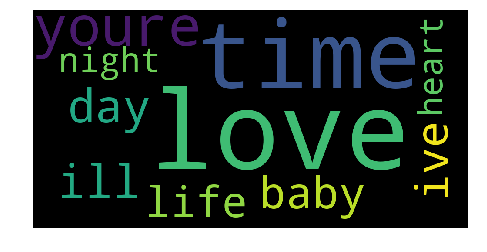

Country


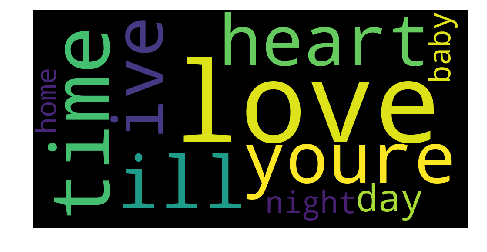

Electronic


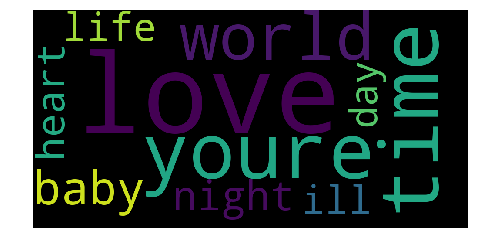

Indie


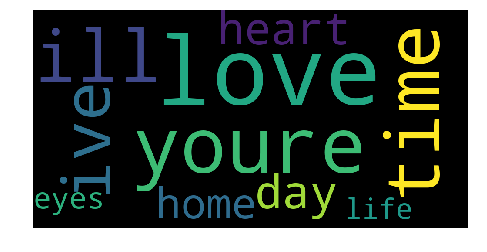

Folk


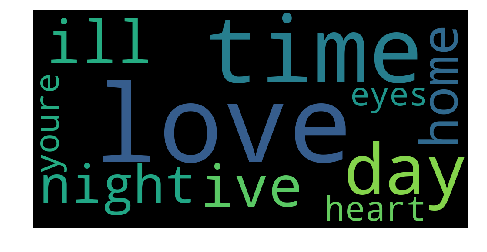

Other


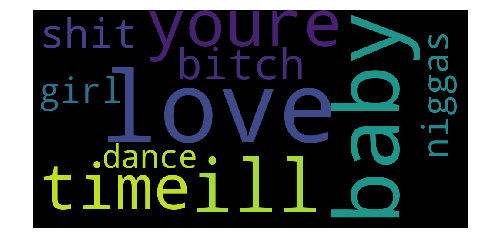

Metal


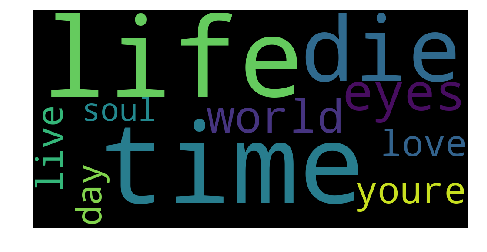

Jazz


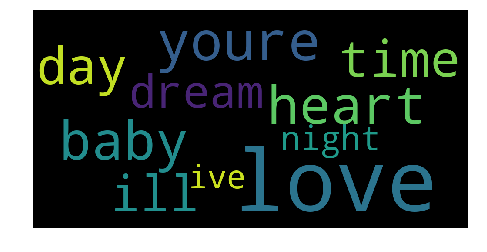

Hip-Hop


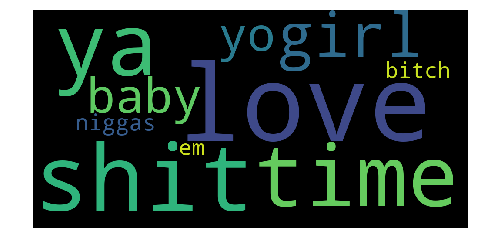

Pop


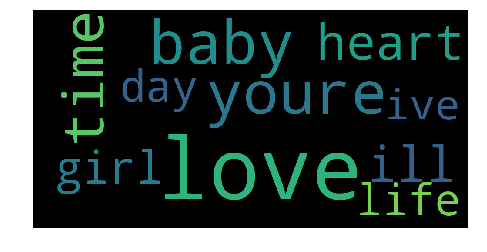

R&B


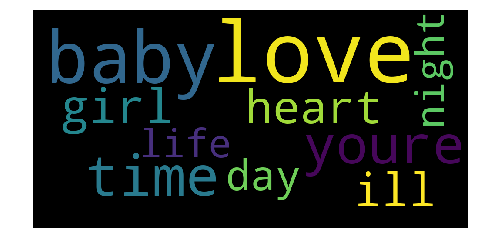

Not Available


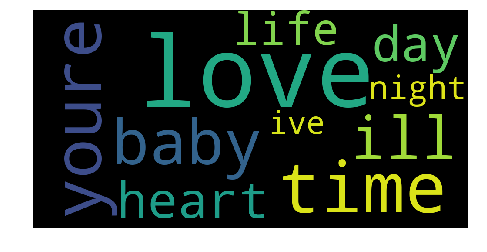

In [11]:
for ly in genre_list:
    print(ly)
    word_cloud_main(ly,'genre',10)

#### It is not hard to see that for most lyrics, some popular words like "love","ill","time" tends to appear everywhere. Here is a bar plot of the intersection popular words in different lyrics:

<BarContainer object of 10 artists>

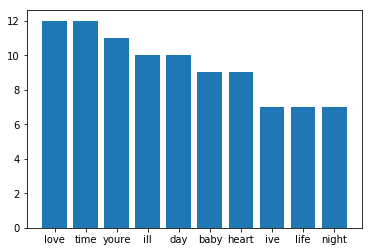

In [12]:
bar_plot_freq('genre',genre_list,10)

#### How about origin? is there only several origin (ie, area) tends to use these words a lot? Let's do the same calculation again but to see what would be the intersection of most popular words in different origin:

<BarContainer object of 10 artists>

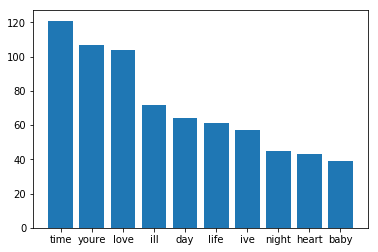

In [13]:
bar_plot_freq('origin',origin_list,10)

##### As you can see, not much different can be found, just some slightly order change among some words. Let's have a last try on this calculation, this time we consider the artist: Is there some artist, tends to use these "popular words" most while others doens't ?

<BarContainer object of 10 artists>

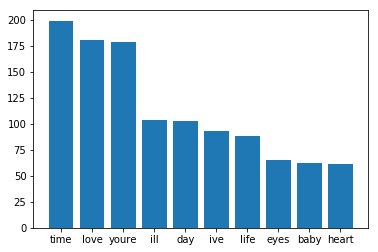

In [14]:
bar_plot_freq('artist',artist_list,10)

#### Honestly with a roughly look at these three bar plot. I would say no intereting insight can be found at all! However, it remind me another direction of thinking the frequency of words appeared, which drive this topic: <font color='Red'>Do artist who has higher vocabulary also tends to use these "popular words"?</font>

####  Let's have a quick look on how would artist's vocabulary vary. Here is the percentage of "unique" words appear in their works. The higher the percentage, the more vocabulary (at least it seems) the artist has. The first datafame shows the  first five artists who has relatively higher vocabulary while the second dataframe shows the last five with lower vocabulary. The range vary from 0.83 to 0.08, sounds a little bit fun now!

In [15]:
# A dataframe that counts for different artist, do they tend to repeat words or now. the larger the value is, the less likely they repeat the words
lists_artist_floatwords=[]
for name in artist_list:
    lists_artist_floatwords.append(float_words_artist_main(name))
df_artist_percentage_unique = pd.DataFrame(lists_artist_floatwords,columns=['artist','percentage_unique_words'])
df_artist_percentage_unique = df_artist_percentage_unique.sort_values('percentage_unique_words',ascending=False)

In [16]:
df_artist_percentage_unique.head(5)

artist  percentage_unique_words
76       focus                 0.826087
142  daughters                 0.740648
217  cryptopsy                 0.675120
108   au-pairs                 0.662531
48     gasolin                 0.656566

In [17]:
df_artist_percentage_unique.tail(5)

artist  percentage_unique_words
183         ac-dc                 0.116283
138  fall-out-boy                 0.115470
74    dragonforce                 0.114739
211      bon-jovi                 0.087382
111     daft-punk                 0.078746

#### Now let's dig it deeper to see what words tend to use often for those artist has lower vocabulary: 

In [18]:
df_artist_percentage_larger = df_artist_percentage_unique[df_artist_percentage_unique['percentage_unique_words'] > 0.65]
artist_larger = list(df_artist_percentage_larger['artist'])
artist_smaller = [item for item in artist_list if item not in artist_larger]

<BarContainer object of 10 artists>

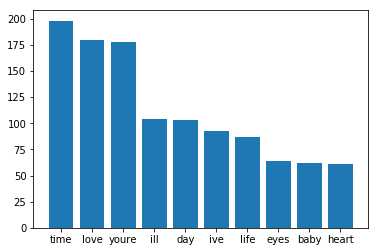

In [19]:
bar_plot_freq('artist',artist_smaller,10)

In [20]:
small_list = list_counts_common_word('artist',artist_smaller,10)
df_small = df_counts_words(small_list,None)
l_small = list(df_small['words'].head(10))
l_small

['time', 'love', 'youre', 'ill', 'day', 'ive', 'life', 'eyes', 'baby', 'heart']

#### And let's also bring the list of the most popular words were being used among all artist (the first list) and to see the difference between these two (the second list)

In [23]:
l_list = list_counts_common_word('artist',artist_list,10)
df_test = df_counts_words(l_list,None).head(10)
l_all = list(df_test['words'].head(10))
l_all
#plt.bar(df_test['words'],df_test['counts'])

['time', 'love', 'youre', 'ill', 'day', 'ive', 'life', 'eyes', 'baby', 'heart']

In [24]:
small_not = np.setdiff1d(l_all,l_small)
list(small_not)

[]

#### <font color='Red'>An empty set</font>! Which means that for those artist with lower vocabulary, the most popular words they are using are the words from genreal popular group. It seems that we are half right to get something interesting: For those artist with lower vocabulary, they tends to use "popular words". 

#### Now let's do the same thing for the group of artits who seems to know more words. 


<BarContainer object of 10 artists>

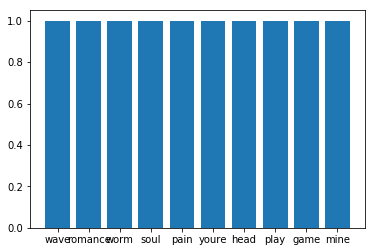

In [25]:
bar_plot_freq('artist',artist_larger,10)

The list of words for artists with higher vocabulary.

In [26]:
large_list = list_counts_common_word('artist',artist_larger,10)
df_larger = df_counts_words(large_list,None)
l_large = list(df_larger['words'].head(10))
l_large
#plt.bar(df_test['words'],df_test['counts'])

['wave',
 'romance',
 'worm',
 'soul',
 'pain',
 'youre',
 'head',
 'play',
 'game',
 'mine']

The differnce of general popular words and popular words for artist in larger vocabulary group

In [27]:
large_not = np.setdiff1d(l_all,l_large)
list(large_not)

['baby', 'day', 'eyes', 'heart', 'ill', 'ive', 'life', 'love', 'time']

#### Among this diff_list result, it says that except <font color='red'> "youre"</font> in the gerneral -popular - group, all other general popular words is not the favourite words for those artits has higher vacabulary.  Which can be conclude as :<font color='green'> the higher the vacabulary that aritst has, the less likly he or she tends to use "the general popular words"</font>

#### Other than that, I also run something to do sentimental analysis. I wonder is there any relationship between popular words and origin (ie, area). I first manully remove all origins that has 'love' and 'ill' in their top 5 popular words(since these two are the most popular positive and negative words among all area). Here is the result for wordcloud.

Arles, France


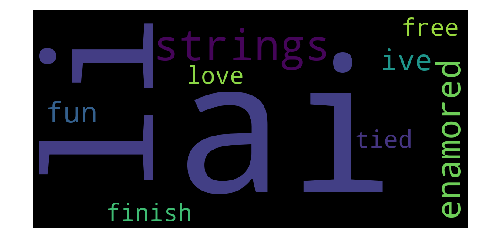

Mission, British Columbia, Canada


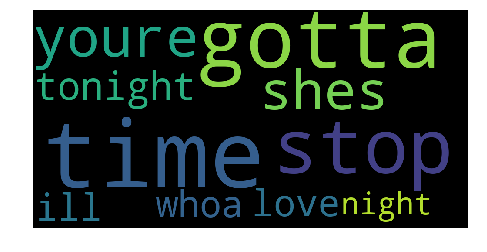

Helsinki, Finland


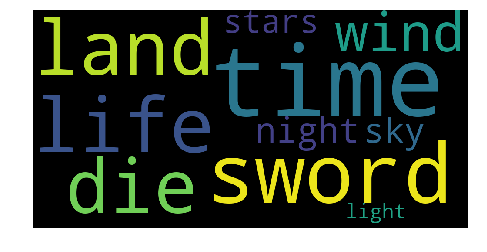

Tumba, Sweden


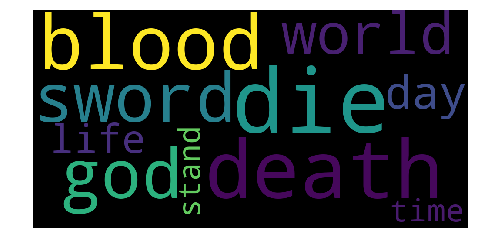

Gothenburg, Sweden


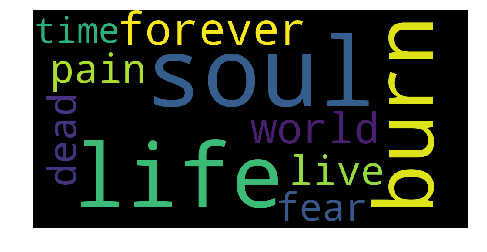

Ibbenburen, Germany


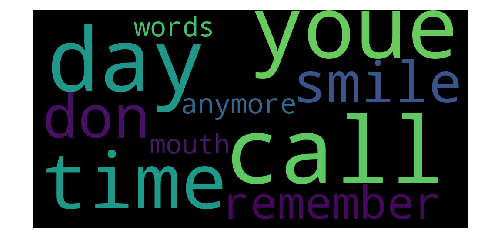

Portland, OR


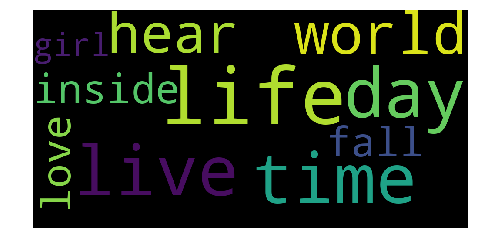

South Carolina


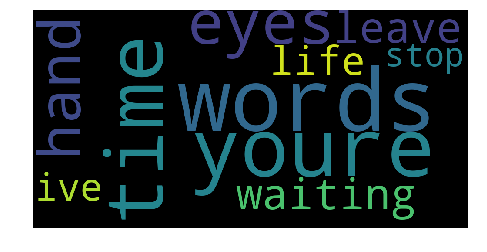

Middelburg, Netherlands


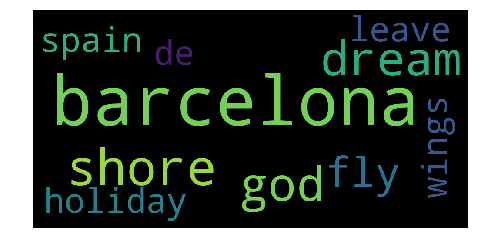

Providence, RI


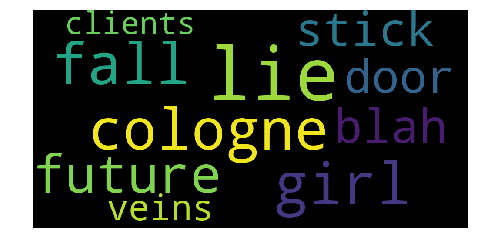

Mesa, AZ


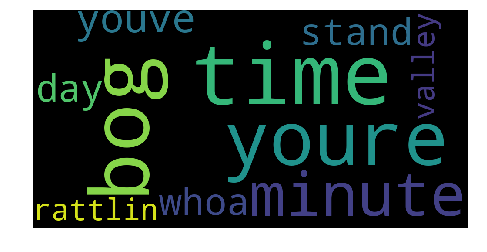

Middlebury, VT


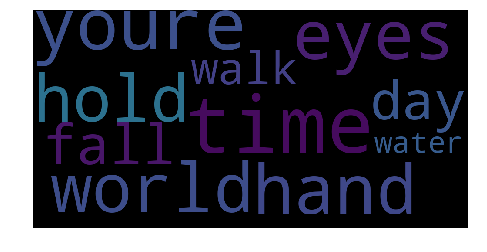

San Diego, CA


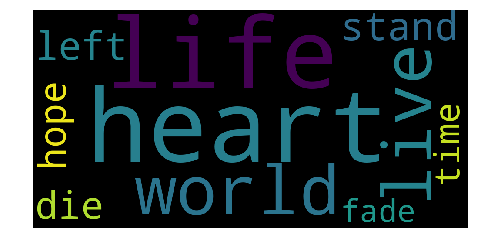

Belgium


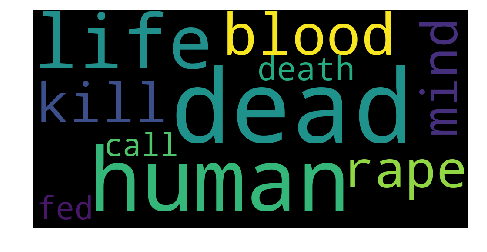

Doraville, GA


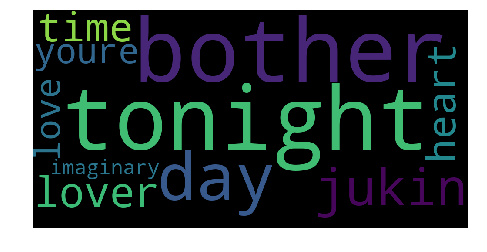

Pittsburgh, PA


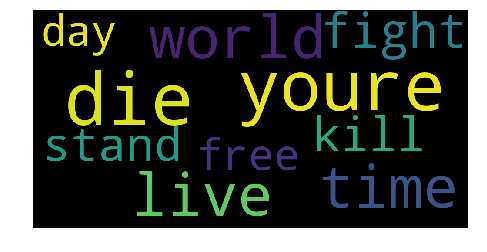

Cumbria, England


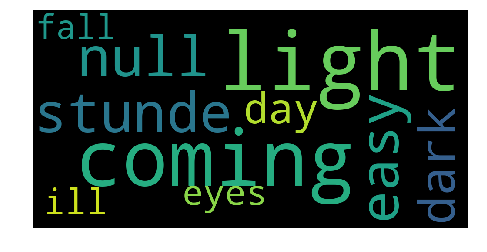

Paris, France


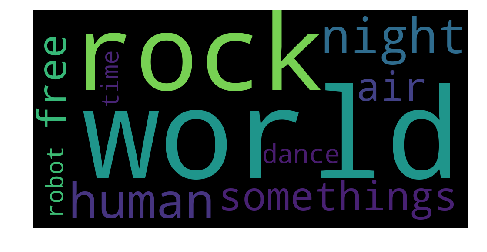

Sweden


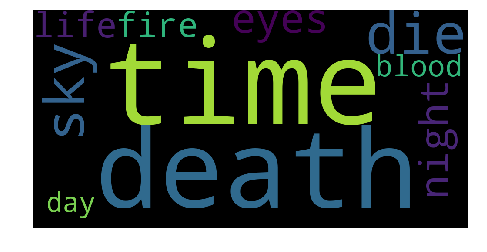

Amsterdam, The Netherlands


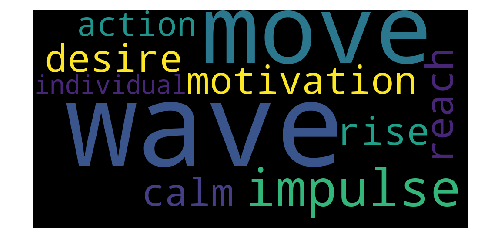

California


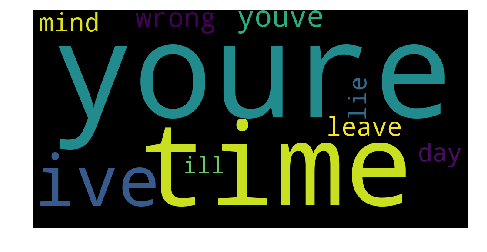

Lörrach, Germany


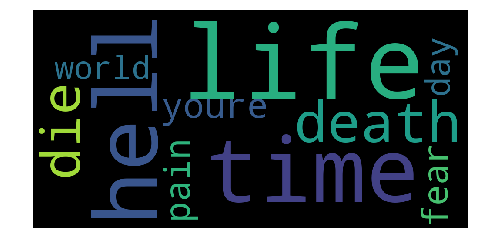

Ottawa, Ontario, Canada


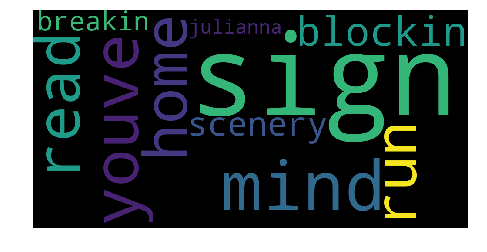

Pompano Beach, FL


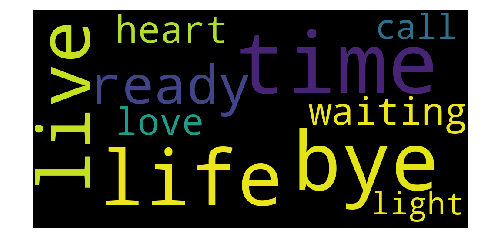

St. Catharines, Ontario, Canada


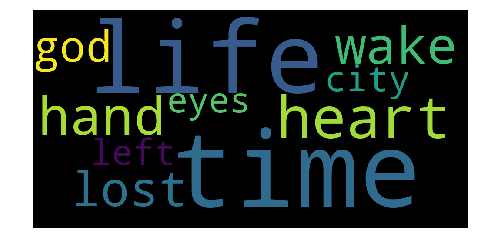

Montreal, Quebec, Canada


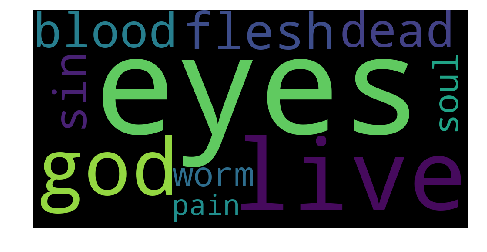

Maryland


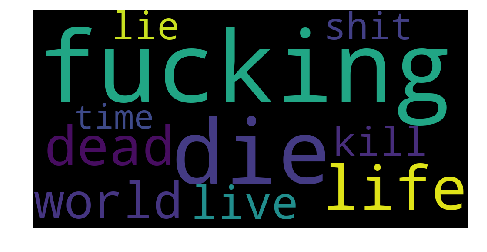

In [28]:
ori_list = []
for ori in origin_list:
    if 'love' not in list(df_counts_words (list((list_all_words(df_add_words( df_origin(ori))))))['words'][:6]) and 'ill' not in list(df_counts_words (list((list_all_words(df_add_words( df_origin(ori))))))['words'][:6]):
        ori_list.append(ori)
        print(ori)
        word_cloud_plot(list((list_all_words(df_add_words( df_origin(ori))))),10)

#### It looks like a mess. Now let's impliment some analysis to make it more clear.  We are using TextBlob here and it return two properties: Polarity and Subjective. 

"Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]."

In [29]:
polarity_list = []
subjectivity_list = []
for ori_filter in ori_list: 
    result_textblob = TextBlob(" ".join(list(df_counts_word_main(ori_filter,'origin',int_common = 10)['words']))).sentiment
    polarity_list.append(result_textblob.polarity)
    subjectivity_list.append(result_textblob.subjectivity)
    #print(TextBlob(" ".join(list(df_counts_word_main(ori_filter,'origin',int_common = 10)['words']))).sentiment)

In [30]:
df_textblob = pd.DataFrame(
    {'origin': ori_list,
     'polarity': polarity_list,
     'subjectivity': subjectivity_list
    })


In [31]:
df_textblob

origin  polarity  subjectivity
0                       Arles, France  0.400000      0.533333
1   Mission, British Columbia, Canada  0.000000      0.800000
2                   Helsinki, Finland  0.400000      0.700000
3                       Tumba, Sweden  0.000000      0.000000
4                  Gothenburg, Sweden -0.031818      0.450000
5                 Ibbenburen, Germany  0.300000      0.100000
6                        Portland, OR  0.318182      0.550000
7                      South Carolina  0.000000      0.000000
8             Middelburg, Netherlands  0.800000      0.900000
9                      Providence, RI  0.000000      0.125000
10                           Mesa, AZ  0.000000      0.000000
11                     Middlebury, VT  0.000000      0.000000
12                      San Diego, CA  0.068182      0.250000
13                            Belgium -0.100000      0.250000
14                      Doraville, GA  0.500000      0.600000
15                     Pittsburgh, PA  0.268182      0.650000
16                   Cumbria, England  0.045833      0.733333
17                      Paris, France  0.200000      0.450000
18                             Sweden  0.000000      0.000000
19         Amsterdam, The Netherlands  0.133333      0.416667
20                         California -0.500000      0.950000
21                   Lörrach, Germany  0.000000      0.000000
22            Ottawa, Ontario, Canada  0.000000      0.000000
23                  Pompano Beach, FL  0.309091      0.575000
24    St. Catharines, Ontario, Canada  0.000000      0.000000
25           Montreal, Quebec, Canada -0.031818      0.450000
26                           Maryland -0.215909      0.625000

#### According to the definition of polarity and subjectivity, I belive if polartiy greater than 0, it would be a relatively positive statement and for subjectivityl, if it is greater than 0.5, it is relatively judgment. I noticed some of origin has both to be 0, which seems to remain an exact balance. 

In [40]:
list_balance = list(df_textblob[(df_textblob['polarity'] == 0) & (df_textblob['subjectivity'] == 0)]['origin'])
list_balance

['Tumba, Sweden',
 'South Carolina',
 'Mesa, AZ',
 'Middlebury, VT',
 'Sweden',
 'Lörrach, Germany',
 'Ottawa, Ontario, Canada',
 'St. Catharines, Ontario, Canada']

#### Wouldn't you curious about what type of genre they have? 

In [41]:
num_orin = []
genre_type =[]
orin = []
for o in list_balance:
    num_orin.append(num_genre_in_origin(o)[0])
    genre_type.append(num_genre_in_origin(o)[1])
    orin.append(num_genre_in_origin(o)[2])

In [44]:
df_origin_balance_type = pd.DataFrame(
    {'origin': list_balance,
     'type_genre': genre_type,
     'num_genre': num_orin
    })


In [45]:
df_origin_balance_type

origin       type_genre  num_genre
0                    Tumba, Sweden          [Metal]          1
1                   South Carolina           [Rock]          1
2                         Mesa, AZ           [Rock]          1
3                   Middlebury, VT           [Rock]          1
4                           Sweden          [Metal]          1
5                 Lörrach, Germany          [Metal]          1
6          Ottawa, Ontario, Canada           [Rock]          1
7  St. Catharines, Ontario, Canada  [Not Available]          1

#### hmmmm I didn't expect that. Let's see the word plot regarding to genre again, and also the sentimental analysis regarding to these genre.

Rock


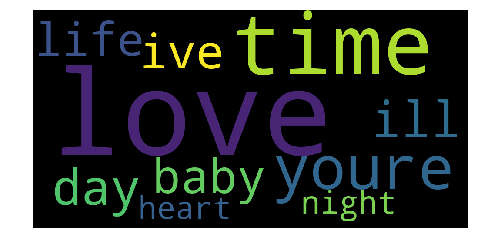

Metal


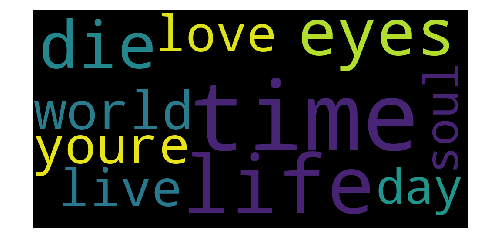

Not Available


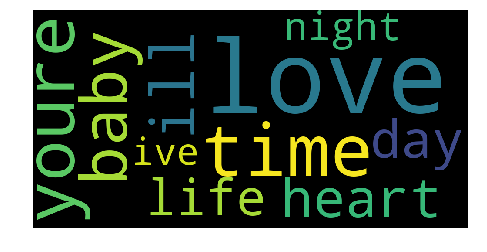

In [61]:
for gen in list(set([val for sublist in genre_type for val in sublist])):
    print(gen)
    word_cloud_main(gen,'genre',int_common=10)

In [67]:
polarity_list_2 = []
subjectivity_list_2 = []
for gen in list(set([val for sublist in genre_type for val in sublist])): 
    result_textblob = TextBlob(" ".join(list(df_counts_word_main(gen,'genre',int_common = 10)['words']))).sentiment
    polarity_list_2.append(result_textblob.polarity)
    subjectivity_list_2.append(result_textblob.subjectivity)
    #print(TextBlob(" ".join(list(df_counts_word_main(ori_filter,'origin',int_common = 10)['words']))).sentiment)

In [69]:
df_textblob_2 = pd.DataFrame(
    {'origin': list(set([val for sublist in genre_type for val in sublist])),
     'polarity': polarity_list_2,
     'subjectivity': subjectivity_list_2
    })


In [70]:
df_textblob_2

origin  polarity  subjectivity
0           Rock  0.000000          0.80
1          Metal  0.318182          0.55
2  Not Available  0.000000          0.80

#### From this comparison, it seems that, For the origin list above, these city tends to have "exact balance" polarity and subjectivity songs, even the genre, on overall saying, doesn't have this property. 